In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
employees = ['EA', 'KR', 'KB', 'CP', 'MM', 'MC']
targets = [65, 45, 85, 45, 85, 70]
months = ['Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov',
         'Dec', 'Jan', 'Feb', 'Mar']

In [4]:
df = pd.DataFrame(list(zip(employees, targets)), columns=['Employees', months[0]])
df.set_index('Employees', inplace=True)
df

,Apr
Employees,
EA,65
KR,45
KB,85
CP,45
MM,85
MC,70


In [5]:
for month in months[1:-5]:
    random_data = [random.randrange(60,140)/100 for employee in df.index]
    df[month] = df['Apr'] * random_data
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65,57.85,43.55,85.15,46.15,83.85,46.15
KR,45,43.65,54.90,42.30,40.95,44.55,58.95
KB,85,59.50,62.05,90.10,87.55,51.85,58.65
CP,45,42.75,45.90,61.20,27.00,28.80,36.90
MM,85,108.80,86.70,113.05,62.05,69.70,108.80
MC,70,46.90,72.80,95.20,66.50,84.70,81.90


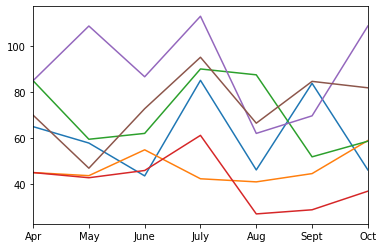

In [6]:
df.T.plot(legend=False)

In [7]:
habitat_avg = df.loc[['EA', 'KR', 'KB']].mean()
habitat_avg

Apr     65.000000
May     53.666667
June    53.500000
July    72.516667
Aug     58.216667
Sept    60.083333
Oct     54.583333
dtype: float64

In [8]:
df.loc['Habitat'] = habitat_avg.T
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.0,57.850000,43.55,85.150000,46.150000,83.850000,46.150000
KR,45.0,43.650000,54.90,42.300000,40.950000,44.550000,58.950000
KB,85.0,59.500000,62.05,90.100000,87.550000,51.850000,58.650000
CP,45.0,42.750000,45.90,61.200000,27.000000,28.800000,36.900000
MM,85.0,108.800000,86.70,113.050000,62.050000,69.700000,108.800000
MC,70.0,46.900000,72.80,95.200000,66.500000,84.700000,81.900000
Habitat,65.0,53.666667,53.50,72.516667,58.216667,60.083333,54.583333


In [9]:
df.loc['Water'] = df.loc[['CP', 'MM', 'MC']].mean()
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.000000,57.850000,43.550000,85.150000,46.150000,83.850000,46.150000
KR,45.000000,43.650000,54.900000,42.300000,40.950000,44.550000,58.950000
KB,85.000000,59.500000,62.050000,90.100000,87.550000,51.850000,58.650000
CP,45.000000,42.750000,45.900000,61.200000,27.000000,28.800000,36.900000
MM,85.000000,108.800000,86.700000,113.050000,62.050000,69.700000,108.800000
MC,70.000000,46.900000,72.800000,95.200000,66.500000,84.700000,81.900000
Habitat,65.000000,53.666667,53.500000,72.516667,58.216667,60.083333,54.583333
Water,66.666667,66.150000,68.466667,89.816667,51.850000,61.066667,75.866667


In [10]:
#Projected Monthly Utilization = If in month, projected utilization, else actual utilization
projected = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
#Projected Yearly Utilization = weighted average of all utilization

In [11]:
projected

""
Employees
EA
KR
KB
CP
MM
MC
Habitat
Water


In [12]:
projected['Apr'] = df['Apr']
projected

,Apr
Employees,
EA,65.000000
KR,45.000000
KB,85.000000
CP,45.000000
MM,85.000000
MC,70.000000
Habitat,65.000000
Water,66.666667


In [13]:
df.mean(axis=1)

Employees
EA         61.100000
KR         47.185714
KB         70.671429
CP         41.078571
MM         90.585714
MC         74.000000
Habitat    59.652381
Water      68.554762
dtype: float64

In [14]:
df.iloc[:,-1]

Employees
EA          46.150000
KR          58.950000
KB          58.650000
CP          36.900000
MM         108.800000
MC          81.900000
Habitat     54.583333
Water       75.866667
Name: Oct, dtype: float64

In [15]:
for month in months:
    if month in df.columns:
        projected[month] = df[month]
    else:
        projected[month] = df.iloc[:,-1]
projected

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,57.850000,43.550000,85.150000,46.150000,83.850000,46.150000,46.150000,46.150000,46.150000,46.150000,46.150000
KR,45.000000,43.650000,54.900000,42.300000,40.950000,44.550000,58.950000,58.950000,58.950000,58.950000,58.950000,58.950000
KB,85.000000,59.500000,62.050000,90.100000,87.550000,51.850000,58.650000,58.650000,58.650000,58.650000,58.650000,58.650000
CP,45.000000,42.750000,45.900000,61.200000,27.000000,28.800000,36.900000,36.900000,36.900000,36.900000,36.900000,36.900000
MM,85.000000,108.800000,86.700000,113.050000,62.050000,69.700000,108.800000,108.800000,108.800000,108.800000,108.800000,108.800000
MC,70.000000,46.900000,72.800000,95.200000,66.500000,84.700000,81.900000,81.900000,81.900000,81.900000,81.900000,81.900000
Habitat,65.000000,53.666667,53.500000,72.516667,58.216667,60.083333,54.583333,54.583333,54.583333,54.583333,54.583333,54.583333
Water,66.666667,66.150000,68.466667,89.816667,51.850000,61.066667,75.866667,75.866667,75.866667,75.866667,75.866667,75.866667


In [16]:
projected.loc[:,'Apr': 'July']

,Apr,May,June,July
Employees,,,,
EA,65.000000,57.850000,43.550000,85.150000
KR,45.000000,43.650000,54.900000,42.300000
KB,85.000000,59.500000,62.050000,90.100000
CP,45.000000,42.750000,45.900000,61.200000
MM,85.000000,108.800000,86.700000,113.050000
MC,70.000000,46.900000,72.800000,95.200000
Habitat,65.000000,53.666667,53.500000,72.516667
Water,66.666667,66.150000,68.466667,89.816667


In [17]:
projected_y = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
for month in months:
    projected_y[month] = projected.loc[:,months[0]:month].mean(axis=1)
projected_y

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,61.425000,55.466667,62.887500,59.54,63.591667,61.100000,59.23125,57.777778,56.615000,55.663636,54.870833
KR,45.000000,44.325000,47.850000,46.462500,45.36,45.225000,47.185714,48.65625,49.800000,50.715000,51.463636,52.087500
KB,85.000000,72.250000,68.850000,74.162500,76.84,72.675000,70.671429,69.16875,68.000000,67.065000,66.300000,65.662500
CP,45.000000,43.875000,44.550000,48.712500,44.37,41.775000,41.078571,40.55625,40.150000,39.825000,39.559091,39.337500
MM,85.000000,96.900000,93.500000,98.387500,91.12,87.550000,90.585714,92.86250,94.633333,96.050000,97.209091,98.175000
MC,70.000000,58.450000,63.233333,71.225000,70.28,72.683333,74.000000,74.98750,75.755556,76.370000,76.872727,77.291667
Habitat,65.000000,59.333333,57.388889,61.170833,60.58,60.497222,59.652381,59.01875,58.525926,58.131667,57.809091,57.540278
Water,66.666667,66.408333,67.094444,72.775000,68.59,67.336111,68.554762,69.46875,70.179630,70.748333,71.213636,71.601389


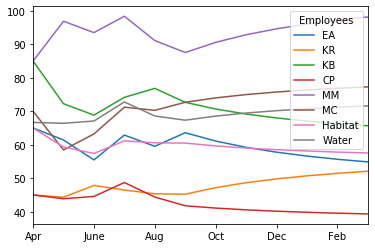

In [18]:
projected_y.T.plot()

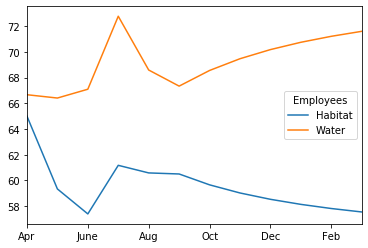

In [19]:
projected_y.loc[['Habitat', 'Water'],:].T.plot()

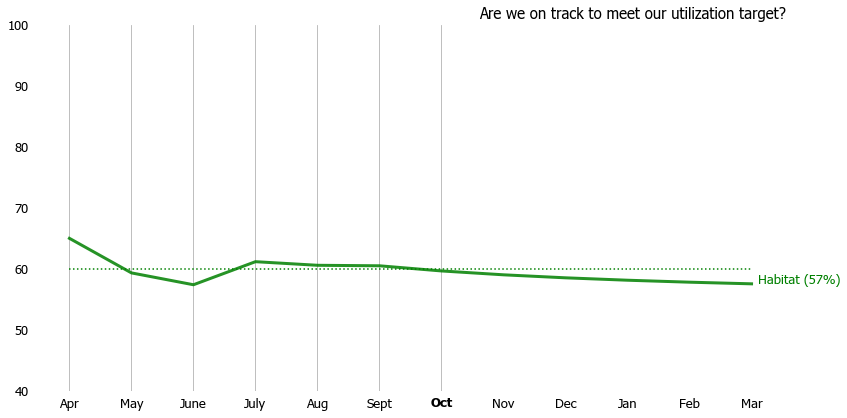

In [20]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
# ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
# ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, zorder=10)
# ax.bar(np.arange(12), habitat_max, width=.05, color='green', alpha=.2)
# ax.bar(np.arange(12), habitat_min, color='white')

# water_min = data[['CP','MM','MC']].min(axis=1)
# water_max = data[['CP','MM','MC']].max(axis=1)
# ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
# ax.plot([water_target]*12, color=water_color, linestyle='dotted')

# ax.plot(data[['EA','KR','KB']], linestyle='', marker='_', color='green', alpha=.6)

# ax.axvline(6, color='grey', alpha=.4, linewidth=3)

# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(40, 100)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.xaxis.grid(True)

# Axes ticks
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
# plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color,
#         fontsize=12)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

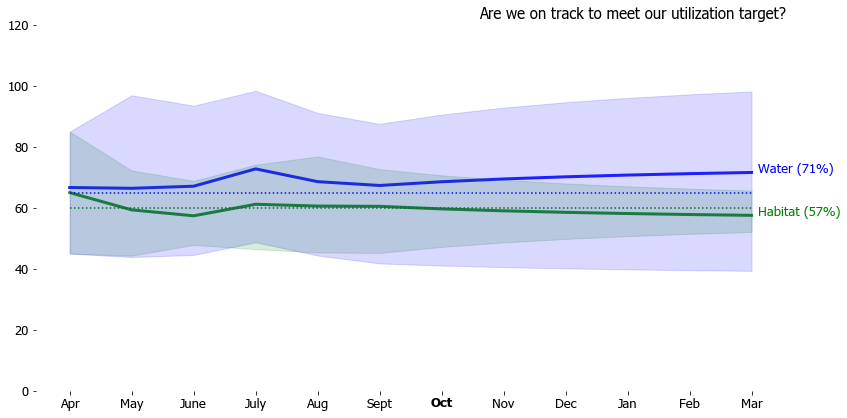

In [21]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, 
                zorder=10)

water_min = data[['CP','MM','MC']].min(axis=1)
water_max = data[['CP','MM','MC']].max(axis=1)
ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15,
               zorder=10)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax.plot([water_target]*12, color=water_color, linestyle='dotted')


# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(0,120)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

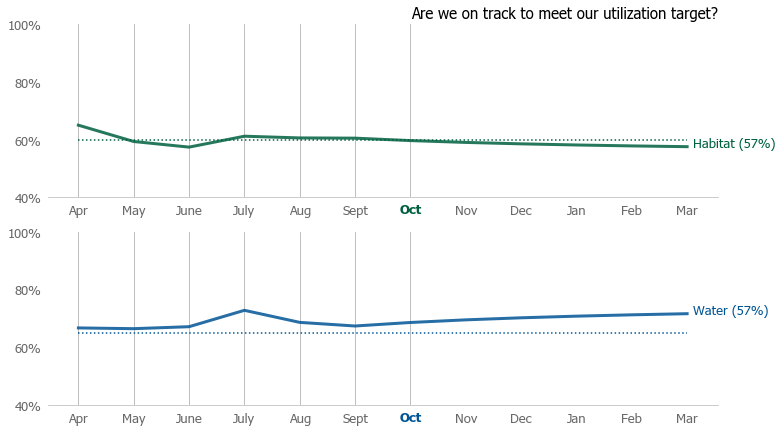

In [22]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6

water_color= '#005595'
habitat_color= '#006040'
water_target = 65
habitat_target = 60

fig, axes = plt.subplots(2,1,figsize=[12,7])
ax1 = axes[0]
ax2 = axes[1]

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax1.axes.axvline(i, color='white', linewidth=2)
    ax2.axes.axvline(i, color='white', linewidth=2)

# Plot data
ax1.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax2.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)

# Plot targets
ax1.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax2.plot([water_target]*12, color=water_color, linestyle='dotted')

# Set title
ax1.set_title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Adjust axes ranges
ax1.set_ylim(40, 100)
ax2.set_ylim(40, 100)

# Adjust number of labels
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))

# Format labels as percent
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Add grid Lines
ax1.yaxis.grid(False)
ax1.xaxis.grid(True)
ax2.yaxis.grid(False)
ax2.xaxis.grid(True)

# Customize grid lines
ax1.axes.grid(axis='x', linestyle='-')
ax2.axes.grid(axis='x', linestyle='-')

# Set below graph objects
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

# Remove Axes ticks
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Recolor axis labels
ax1.tick_params(colors='dimgrey')
ax2.tick_params(colors='dimgrey')

# Remove axes spines
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_color('silver')

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_color('silver')

# Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
ax1.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
ax2.text(11.1, water_value, f'Water ({int(habitat_value)}%)', color=water_color)

# Indicate current month
ax1.get_xticklabels()[current_month].set_fontweight('bold')
ax1.get_xticklabels()[current_month].set_color(habitat_color) #Black draws too much attention as new color
ax2.get_xticklabels()[current_month].set_fontweight('bold')
ax2.get_xticklabels()[current_month].set_color(water_color)

plt.show()

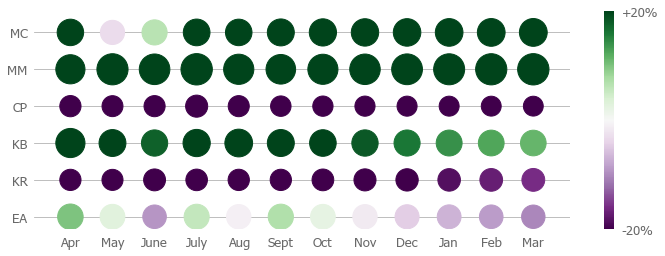

In [66]:
fig, ax3 = plt.subplots(figsize=[12,4])

# colorbar = ax3.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
# norm = colors.Normalize()
cmap = 'PRGn'
norm = plt.Normalize(vmin=50, vmax=70)

for idx, emp in enumerate(employees):
    x = data.index
    y = [idx] * len(data.index)
    size = data[emp]
    color = data[emp]
    ax3.scatter(x, y, s=size*10, c=color, cmap=cmap, norm=norm)
#     ax3.scatter(x, y, s=size*10, c=color, cmap='PRGn', vmin=50, vmax=70)
#     ax.scatter(x, y, s=size, facecolors='none', edgecolors='blue')

ax3.set_yticklabels([''] + employees + [''])  # top and bottom ticks are blank

ax3.yaxis.grid(True)
ax3.set_axisbelow(True)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax3.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# ax3.tick_params(axis='x', pad=30)

# fig.colorbar(ax=ax3)
cmap = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(cmap, ax=ax3, ticks=[50,70])
# cbar.set_label('% Utilization Over/Under Planned Utilization', color='dimgrey')
cbar.outline.set_edgecolor('none')
cbar.ax.yaxis.set_tick_params(color='none')
cbar.ax.set_yticklabels(['-20%', '+20%'])
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='dimgrey')

# Recolor axis labels
ax3.tick_params(colors='dimgrey')

plt.show()